# **1. Intro to Numpy**


## Numpy examples with vector and matrices

In [2]:
# import numpy library
import numpy as np

# Vector definitions
size = (1,3)

ones = np.ones(size)
zeros = np.zeros(size)
normal_vector = np.random.randn(1,5)
rand_int_vector = np.random.randint(low=1,high=4,size=(1,10))

print(ones)
print(zeros)
print(normal_vector)
print(rand_int_vector)
print(normal_vector.shape)



[[1. 1. 1.]]
[[0. 0. 0.]]
[[ 1.3276196   0.90370927  0.96220432 -0.4921485   0.24648455]]
[[1 2 2 1 3 2 1 1 3 1]]
(1, 5)


In [ ]:
# Matrix definitions
identity = np.eye(5)
normal_matrix = np.random.randn(5,5)

print(identity)
print(normal_matrix)


In [ ]:
# Matrix definitions
identity = np.eye(5)
normal_matrix = np.random.randn(5,5)

print(identity)
print(normal_matrix)


In [ ]:
# Matrix - vector operations

# Dot product
print(ones.dot(ones.T)) # .T for transposing

# Element-wise multiplication
print(ones*ones)

# Matrix vector mulitplication
print(normal_vector.dot(identity))

# Matrix multiplication
print(identity.dot(normal_matrix))

# Matrix element-wise multiplication
print(identity*normal_matrix)


In [ ]:
# Data manipulation
x = np.array([1,2,3,4,5,6,7],dtype=np.float32)
y = np.array([[1,2,3],[4,5,6],[7,8,9]],dtype=np.float32)
print(x)
print(y)
print(y.shape)
#or from the list
#z = np.asarray(range(0,len(x)),dtype=np.float32)
#print(z)

#Acessing the data (Indexing-> x[initial:end:step])
print(x)
print(x[0:5:1])
print(x[0:5:2])
print(x[6:3:-1])

In [ ]:
#see the array dimesnions, shape, and num elements
print(x.ndim,x.shape, x.size)
print(y.ndim,y.shape, y.size)

#adding a dimension
x_2 = np.expand_dims(x,axis = 0)
print(x_2.shape)

#flatten back x_2
x_2_1 = x_2.flatten()
print(x_2_1)

#now to join two array
xy = np.array([x,x])
x_y = np.column_stack([x,x])

print(xy.shape)
print(x_y.shape)


# **2. LOADING AND SAVING DATA FROM GOOGLE DRIVE**

### Mounting GoogleDrive folder

In [3]:
##Opening Data And saving
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive/')
data_path = '/content/drive/My Drive/DeepLearning_2023/P1/Data/'
results_path = '/content/drive/My Drive/DeepLearning_2023/P1/Results/'
# list files in path
!ls '/content/drive/My Drive/DeepLearning_2023/P1/Data/'

Mounted at /content/drive/
cat_1.jpg  cat_dog_large.jpg  dog_1.jpg  test.csv  train.csv


## Loading tabular data
It is recommended to use external libraries to accelerate data processing. In this case we use Pandas or Numpy

In [ ]:
#usage of Pandas to read and load data
import pandas as pd
import matplotlib.pyplot as plt #  matplotlib for visualization

# Load table from csv file
csvData = pd.read_csv(data_path+'train.csv')
csvData.head()

# Show table
print(csvData)

# Visualize data
plt.scatter(csvData.X,csvData.Y, c=csvData.C)

## Loading and saving images
For basic plotting, we will use matplotlib libraries, whereas for basic image processing, we will use opencv and PIL. The latter is used natively by ptorch


In [ ]:
# import iamge processing libraries
from PIL import Image
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# load images
ImagePIL = Image.open(data_path+'cat_1.jpg')
ImageCV = cv2.imread(data_path+'cat_1.jpg')

#Basic plotting (both)
plt.imshow(ImagePIL)

In [ ]:
# Visualize images

plt.subplot(1,2,1) # subplot with 1 row and 2 columns
plt.imshow(ImageCV) # Opencv works with BGR format

# Correct the image
imageCVP = cv2.cvtColor(ImageCV, cv2.COLOR_BGR2RGB)
plt.subplot(1,2,2)
plt.imshow(imageCVP) # Opencv works with BGR format


In [ ]:
# Save modifider image
cv2.imwrite(results_path+"cat_modified_CV.jpg",imageCVP)

# **3. Intro to PyTorch** (ref: https://pytorch.org/tutorials/ )

### Basic operations

In [4]:
import torch
# Similar functions than numpy (check https://pytorch.org/tutorials/beginner/former_torchies/tensor_tutorial.html )

# Vector definitions
size = (1,3)
ones = torch.ones(size)
zeros = torch.zeros(size)
normal_vector = torch.randn(5)
rand_int_vector = torch.randint(low=1,high=4,size=(1,10))

print(ones)
print(zeros)
print(normal_vector)
print(rand_int_vector)
print(normal_vector.shape)



tensor([[1., 1., 1.]])
tensor([[0., 0., 0.]])
tensor([-0.2334, -0.3873, -0.1943,  0.9296,  0.1509])
tensor([[1, 1, 2, 3, 1, 1, 3, 2, 1, 1]])
torch.Size([5])


In [ ]:
#Matrices
identity = torch.eye(5)
normal_matrix = torch.randn(5,5)

print(identity)
print(normal_matrix)


In [ ]:
# Matrix - vector operations

# Dot product
print(ones.matmul(ones.T)) # .T for transposing

# Element-wise multiplication
print(ones*ones)

# Matrix vector mulitplication
print(normal_vector.matmul(identity))

# Matrix multiplication
print(identity.matmul(normal_matrix))

# Matrix element-wise multiplication
print(identity*normal_matrix)

## From numpy to pytorch

In [ ]:
# import pytorch
import torch

# declare python list
scoreHours = []
#iterate over table rows
for index,row in csvData.iterrows():
  scoreHours.append([row.X,row.Y])

# convert to numpy array
scoreHours = np.asarray(scoreHours)

print(scoreHours)
# convert to pytorch tensor
scoreHoursTorch = torch.from_numpy(scoreHours)
print(scoreHoursTorch)



## CPU / CUDA (GPU) operations
Remeber to activate GPU acceleration a GoogleColab options (Runtime-Change Runtype type)!!!

In [ ]:
import numpy as np
import torch

In [ ]:
# Benchmark - operations in numpy
%%time
w = np.zeros([2000,200])
x = np.ones([200,2000])
z = np.ones([2000])

for i in range(10):
  y = np.matmul(w,x)
  y = np.matmul(y,z)

CPU times: user 841 ms, sys: 80.8 ms, total: 921 ms
Wall time: 1.19 s


In [ ]:
w.shape

(2000, 200)

In [ ]:
# Benchmark - operations in pytorch (CPU)
%%time
w = torch.zeros([2000,200]).cpu()
x = torch.ones([200,2000]).cpu()
z = torch.ones([2000]).cpu()

for i in range(10):
  y = torch.matmul(w,x)
  y = torch.matmul(y,z)

In [ ]:
# Benchmark - operations in pytorch (GPU) (Run two times in case you don't observe accelration)
%%time
w = torch.zeros([2000,200]).cuda()
x = torch.ones([200,2000]).cuda()
z = torch.ones([2000]).cuda()

for i in range(10):
  y = torch.matmul(w,x)
  y = torch.matmul(y,z)

## Generate synthetic 2D regression problem

(6, 2) (6, 1)


Text(0, 0.5, 'Study')

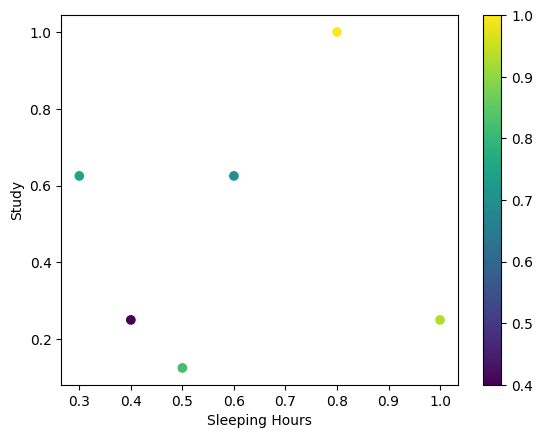

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# X = (hours sleeping, hours studying), y = Score on test
X = np.array(([3,5], [5,1], [10,2],[4,2],[8,8],[6,5]), dtype=float)
y = np.array(([75], [82], [93],[40],[100],[70]), dtype=float)

print(X.shape,y.shape)


# Normalize data (standard pre-processing technique in Deep Learning)
X = X/np.amax(X, axis=0)
y = y/100 #Max test score is 100

plt.scatter(X[:,0],X[:,1],c=y)
plt.colorbar()
plt.xlabel('Sleeping Hours')
plt.ylabel('Study')



In [19]:
X.shape

(6, 2)

# **4. Basic Multi Layer Perceptron with Numpy**

<figure>
<center>
<img src='https://i.pinimg.com/originals/34/5b/60/345b60c78cb2229a97665356efdf3bac.png' width="500" height="300"/>
<figcaption>Multilyaer perceptron illustration</figcaption></center>
</figure>


## Define a class implementing a simple MLP


1.   MLP models a function $y=f(x,W_2,W_1)$ as $y=\sigma(W_2\sigma(W_1x))$
2.   Where $\sigma$ is an activation function (the sigmoid in this case)
3.   Mean Squared Error Loss (L2) for our regression problem: $l = \frac{1}{2} (f(x_i) - y_i)^2$
4.   Derivatives with back-propagation:  **prove it yourself to see where it comes from! ;)**

$\frac{\delta l}{\delta W_2}=   [(y_i-f(x_i)) f(x_i) (1-f(x_i))] \sigma(W_1x)$

$\frac{\delta l}{\delta W_1}=  \bigg([(y_i-f(x_i)) f(x_i) (1-f(x_i))] W^T_2  \odot \sigma(W_1x) \odot (1-\sigma(W_1x))\bigg) x^T_i$












In [5]:
# MLP Class:
class MLP(object):
    def __init__(self,inputNode=2,hiddenNode = 3, outputNode=1):
        #Define MLP hyper-parameters
        self.inputLayerSize = inputNode # number of input dimensions (x)
        self.outputLayerSize = outputNode # number of output dimensions (y)
        self.hiddenLayerSize = hiddenNode # Dimension of intermediate layer (W_2)

        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)

    def forward(self, X):
        #Compute inputs from outputs
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat

    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))

    # Derivative of sigmoid and loss with respect their inputs
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)

    def loss(self, yHat, y):
        #Compute loss for given X,y, use weights already stored in class.
        J = 0.5*sum((y-yHat)**2)
        return J

    # Derivative of parameters
    def backward(self,X, yHat, y):
        self.yHat = yHat

        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)

        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)
        return dJdW1,dJdW2

## Define a train function implementing gradient descent iterations (epochs)

In [6]:
def train(NN,X, y,epoch = 10000,lr = .1):
    list_loss = []

    for i in range(epoch):
        #Compute derivative with respect to W and W2 for a given X and y:
        yHat = NN.forward(X)

        gradW1,gradW2 = NN.backward(X,yHat,y)
        #now update the weight using gradient descent
        NN.W1 -= gradW1 * lr
        NN.W2 -= gradW2 * lr

        if i%100 == 0 :
            loss = NN.loss(yHat,y)
            print('Loss {}={}'.format(i,loss))
            list_loss.append(loss)

    return list_loss

## Train the MLP with the synthetic data and gradient descent with back-propagation

In [14]:
NN = MLP(hiddenNode=3)
#Train network with the data:
list_loss = train(NN,X,y, epoch=10000, lr=0.01)

Loss 0=[0.78151402]
Loss 100=[0.59635352]
Loss 200=[0.45442699]
Loss 300=[0.35372904]
Loss 400=[0.28394418]
Loss 500=[0.23544053]
Loss 600=[0.20133979]
Loss 700=[0.17706431]
Loss 800=[0.1595833]
Loss 900=[0.14686009]
Loss 1000=[0.13750223]
Loss 1100=[0.13054419]
Loss 1200=[0.12530943]
Loss 1300=[0.12132015]
Loss 1400=[0.11823666]
Loss 1500=[0.11581602]
Loss 1600=[0.11388345]
Loss 1700=[0.11231251]
Loss 1800=[0.1110112]
Loss 1900=[0.1099122]
Loss 2000=[0.108966]
Loss 2100=[0.108136]
Loss 2200=[0.10739502]
Loss 2300=[0.10672277]
Loss 2400=[0.10610406]
Loss 2500=[0.10552746]
Loss 2600=[0.10498436]
Loss 2700=[0.10446822]
Loss 2800=[0.10397409]
Loss 2900=[0.10349818]
Loss 3000=[0.10303761]
Loss 3100=[0.10259016]
Loss 3200=[0.1021541]
Loss 3300=[0.10172812]
Loss 3400=[0.10131119]
Loss 3500=[0.10090248]
Loss 3600=[0.10050137]
Loss 3700=[0.10010732]
Loss 3800=[0.09971993]
Loss 3900=[0.09933885]
Loss 4000=[0.09896379]
Loss 4100=[0.09859453]
Loss 4200=[0.09823083]
Loss 4300=[0.09787253]
Loss 440

In [24]:
X

array([[0.3  , 0.625],
       [0.5  , 0.125],
       [1.   , 0.25 ],
       [0.4  , 0.25 ],
       [0.8  , 1.   ],
       [0.6  , 0.625]])

## Visualize results

In [ ]:
# Loss function iterations
import matplotlib.pyplot as plt
plt.plot(list_loss)
plt.xlabel('Iterations')
plt.ylabel('Loss Val')

In [ ]:
from mpl_toolkits.mplot3d import Axes3D #<-- Note the capitalization!
Axes3D = Axes3D  # pycharm auto import

#Test network for various combinations of sleep/study:
hoursSleep = np.linspace(0, 10, 100)
hoursStudy = np.linspace(0, 5, 100)

#Normalize data (same way training data way normalized)
hoursSleepNorm = hoursSleep/10.
hoursStudyNorm = hoursStudy/5.

#Create 2-d grid of samples input for plotting
a, b  = np.meshgrid(hoursSleepNorm, hoursStudyNorm)

#Join into a single input matrix:
allInputs = np.zeros((a.size, 2))
allInputs[:, 0] = a.ravel()
allInputs[:, 1] = b.ravel()

# Use the MLP to predict the values in the grid
allOutputs = NN.forward(allInputs)

# Plot surface showing the prdicionts for each Hours Study/Sleep case
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
CS = ax.plot_surface(a*10,b*5,100*allOutputs.reshape(100, 100))

ax.set_xlabel('Hours Sleep')
ax.set_ylabel('Hours Study')
ax.set_zlabel('Score')
ax.scatter(X[:,0]*10,X[:,1]*5,y*100,s=100,c='r') # Plot training points unnormalizing them
plt.show()

## **Implementing an optimizer**
So far, we have been using standard gradient descent to optimize the parameters during back-propagation. However, in many cases we are interested in using more sohphisticated optimization mechanisms (e.g, SGD with momentum). In this cases, it is useful to encapsulate the optimizer implementation in a class. As we'll see later, this strategy is used by Deep Learning libraries such as PyTorch.

## Define the optimizer class

In [ ]:
# Class implementing standard gradient-descent (only hyper-parameter is the learning-rate)
class OptimSGD(object):
    def __init__(self,learning_rate = .001):
        self.lr = learning_rate
    # receive the parameters of the MLP and the computed gradients and update the latter
    def step(self,weight_list,gradient):
        uw = []
        for w,grd in zip(weight_list,gradient) :
            uw.append(w - self.lr * grd)
        return uw

## Using the optimizer class during training

In [ ]:
# Same training procedure than befor but using the optimizer class
def train_woptimizer(NN,X, y,epoch = 5000,optim = None):
    list_loss = []

    for i in range(epoch):
        #Compute derivative with respect to W and W2 for a given X and y:
        yHat = NN.forward(X)

        gradW1,gradW2 = NN.backward(X,yHat,y)
        '''#now update the weight using gradient descent and the optimizer class
        NN.W1 -= gradW1 * lr
        NN.W2 -= gradW2 * lr'''
        NN.W1, NN.W2 = optim.step([NN.W1,NN.W2],[gradW1,gradW2])

        if i%100 == 0 :
            loss = NN.loss(yHat,y)
            print('Loss {}={}'.format(i,loss))
            list_loss.append(loss)

    return list_loss

## Training with optimizer

In [ ]:
NN = MLP()
#Train network with the data:
optim = OptimSGD(.5)
list_loss = train_woptimizer(NN,X,y,optim=optim)
plt.plot(list_loss)
plt.xlabel('Iterations')
plt.ylabel('Loss Val')

# **5. AutoGrad in PyTorch**
Implementing back-propagation in complex neural networks is tedious and prone to implementation errors. Modern Deep Learning libraries such as PyTorch use automatic differentiaion to avoid this problem. In particular, only the forward pass and the loss of the networks need to be implemented. Then, the framework automatically compute the gradients during back-propagation.

## Examples of AutoGrad in Pytorch

In [ ]:
# Simple example of autograd in pytorch
import torch
# create a tensor
x = torch.tensor(2.0,requires_grad = True)
print(x)

# define a function z with respect to the tensor
z = x**2  + x

# compute the gradients of z with respect to x
z.backward() #The gradient, eq to z.backward(torch.tensor(1.0))


print(x.grad) # The gradients are stored in the grad attribute of the tensor x


In [ ]:
# Another example with more variables required to compute the gradients
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)

# Build a computational graph.
y = w * x + b    # y = 2 * x + 3
print(y)

# Compute gradients.
y.backward()

# Print out the gradients.
print(x.grad)    # x.grad = 2
print(w.grad)    # w.grad = 1
print(b.grad)    # b.grad = 1

In [ ]:
# During the forward pass, intermediate variables needed to compute the backward pass are stored.
# This consumes memory. If derivatives are not needed, we can reduce memoty by indicating that we
# will not require to run the backward-pass.
z = torch.tensor(1., requires_grad=True)

with torch.no_grad():
  y = 1/(1+torch.exp(-z))

# This will generate an error since no intermediate variables have been computed during forward
#y.backward()

# **6. Implementing an MLP with PyTorch and AutoGrad**
Apart from automatic differentiation, PyTorch also offers tools to encapsulate the different building blocks of neural networks ( they are called modules). Additionally, it implements many other tools such as optimizers. In the following, we are goin to implement the previous MLP with PyTorch.

## Generate the same synthetic data than before with PyTorch tensors

In [ ]:
import numpy as np
import torch.nn as nn
import torch
import numpy as np
import matplotlib.pyplot as plt

# X = (hours sleeping, hours studying), y = Score on test
X = torch.tensor(np.array(([3,5], [5,1], [10,2],[4,2],[8,8],[6,5]), dtype=np.float32))
y = torch.tensor(np.array(([75], [82], [93],[40],[100],[70]), dtype=np.float32))

# Normalize
X = X/torch.max(X, dim=0)[0]
y = y/100 #Max test score is 100

print(X,y)

tensor([[0.3000, 0.6250],
        [0.5000, 0.1250],
        [1.0000, 0.2500],
        [0.4000, 0.2500],
        [0.8000, 1.0000],
        [0.6000, 0.6250]]) tensor([[0.7500],
        [0.8200],
        [0.9300],
        [0.4000],
        [1.0000],
        [0.7000]])


## Define MLP in PyTorch

In [ ]:
# DEFINE AN MLP MODULE:
import torch


# This library include many modules implementing NN building blocks and loss functions
import torch.nn as nn

class MLP_PyTorch(nn.Module):
    def __init__(self,inputNode=2,hiddenNode = 3, outputNode=1):
        super(MLP_PyTorch, self).__init__()
        #Define Hyperparameters
        self.inputLayerSize = inputNode
        self.outputLayerSize = outputNode
        self.hiddenLayerSize = hiddenNode

        # Initialize two modules implementing the two linear layers of the MLP
        self.Linear1 = nn.Linear(self.inputLayerSize, self.hiddenLayerSize)
        self.Linear2 = nn.Linear(self.hiddenLayerSize, self.outputLayerSize)

        self.sigmoid = nn.Sigmoid() # Module implementing the sigmoid funciton
        self.loss = nn.MSELoss() # Module implementing the mean-squared error loss

    # Define the forward pass of the module using the sub-modules declared in the initializer
    def forward(self, X):
        out = self.Linear1(X) # First Linear Layer
        out = self.sigmoid(out) # activation function
        out = self.Linear2(out) # Second Linear Layer
        y_hat = self.sigmoid(out) # final activation function
        return y_hat

    # No need to implement the backward pass since we'll use automatic differentitaion
    #def backward()


## Train function

In [ ]:


# Function to train our MLP with PyTorch
def train_PyTorch(NN,X, y,epoch = 10000,lr = .01,optimizer = None):
    list_loss = []
    for i in range(epoch):
        # reset optimizer at each epoch
        optimizer.zero_grad()

        # Process the dataset with the forward pass
        yHat = NN.forward(X)
        # and compute the loss function
        loss_val = NN.loss(yHat,y)

        # Automatically compute the gradients
        loss_val.backward()
        # Call the optimizer to update the paramters
        optimizer.step()

        # Print loss and save the value at each iteration
        if i%500 == 0 :
            print('Loss {}={}'.format(i,loss_val))
        list_loss.append(loss_val.item())
    print('Loss {}={}'.format(i,loss_val))
    return list_loss

## Train PyTorch MLP

Loss 0=0.19109958410263062
Loss 500=0.053374528884887695
Loss 1000=0.04008745774626732
Loss 1500=0.03798866644501686
Loss 2000=0.037509556859731674
Loss 2500=0.037362467497587204
Loss 3000=0.037295643240213394
Loss 3500=0.03724989295005798
Loss 4000=0.03721000626683235
Loss 4500=0.03717179223895073
Loss 5000=0.037134137004613876
Loss 5500=0.03709666058421135
Loss 6000=0.037059247493743896
Loss 6500=0.03702184185385704
Loss 7000=0.03698441758751869
Loss 7500=0.03694693371653557
Loss 8000=0.036909375339746475
Loss 8500=0.03687167540192604
Loss 9000=0.036833859980106354
Loss 9500=0.036795880645513535
Loss 9999=0.036757782101631165


Text(0, 0.5, 'Loss Val')

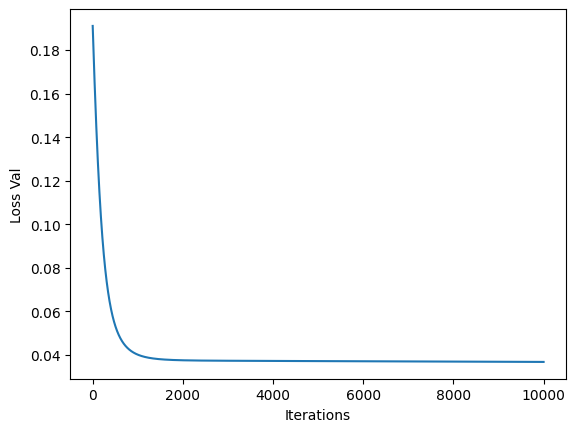

In [ ]:
# Initialize a Pytorch MLP
NN = MLP_PyTorch()

# Initialize a standard SGD optimizer using torch.optim library
# nNN.parameters() return a list of all the paramters in the network. This paramters
# are automatically registered if declared in the __init__ function of an object nn.Module
# The optimizer stores the reference of this paramters in order to update them during optimization
optimizer = torch.optim.SGD(NN.parameters(), lr=.01)

#Train MLP using Pytorch:
list_loss = train_PyTorch(NN,X,y,optimizer = optimizer)

# Plot the evolution of the loss function during training
plt.plot(list_loss)
plt.xlabel('Iterations')
plt.ylabel('Loss Val')